In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

Meal_Id                        Name catagory  \
0  meal_id1         summer squash salad    salad   
1  meal_id2        chicken minced salad    salad   
2  meal_id3        sweet chilli almonds   chilli   
3  meal_id4             tricolour salad    salad   
4  meal_id5  gluten-free christmas cake     cake   

                                         description  Veg_Non   Nutrient  \
0  white balsamic vinegar, lemon juice, lemon rin...      veg      fiber   
1  olive oil, chicken mince, garlic (minced), oni...  non-veg      fiber   
2  almonds whole, egg white, curry leaves, salt, ...      veg  vitamin_a   
3  vinegar, honey/sugar, soy sauce, salt, garlic ...      veg      fiber   
4  christmas dry fruits (pre-soaked), orange zest...      veg  vitamin_a   

                                             Disease  \
0              obesity diabeties hypertension goitre   
1   anemia pregnancy hypertension rickets goitre ...   
2   hypertension scurvy heart_disease goitre kidn...   
3                        obesity goitre hypertension   
4                              goitre kidney_disease   

                                                Diet  Price  
0   alkaline_diet low_fat_diet ketogenic_diet low...    485  
1   low_fat_diet low_carb_diet ketogenic_diet low...    600  
2   alkaline_diet low_fat_diet paleo_diet Mediter...    255  
3   low_fat_diet ketogenic_diet low_sodium_diet h...    615  
4                                  high_protien_diet    465

In [7]:
all_diets = set()
for diet in df['Diet']:
    if isinstance(diet, str):
        all_diets.update(diet.split(' '))
all_diets.remove('')
all_diets = sorted(all_diets)
all_diets

['Mediterranean_diet',
 'alkaline_diet',
 'dash_diet',
 'gluten_free_diet',
 'high_fiber_diet',
 'high_protien_diet',
 'hormone_diet',
 'ketogenic_diet',
 'low_carb_diet',
 'low_fat_diet',
 'low_sodium_diet',
 'omni_diet',
 'paleo_diet',
 'type_a_diet',
 'type_o_diet',
 'vegan_diet']

In [104]:
people_data = pd.read_csv('personal_health_data.csv')
people_data_ml = people_data[['Age', 'Gender', 'Weight', 'Height','Medication', 'Smoker', 'Alcohol_Consumption', 'Water_Intake', 'Heart_Rate']]

people_data_ml.head()

Age Gender      Weight      Height Medication Smoker Alcohol_Consumption  \
0   61  Other   88.677623  178.524231         No     No            Moderate   
1   24   Male   86.742084  200.346358        Yes     No            Moderate   
2   81  Other   61.656054  195.971356        Yes     No            Moderate   
3   70  Other  141.513794  164.178216         No     No               Heavy   
4   30  Other   80.552872  146.920675        Yes    Yes               Heavy   

   Water_Intake  Heart_Rate  
0      3.105556         147  
1      2.441118         147  
2      1.240341         176  
3      1.682383         157  
4      1.461862          86

In [105]:
gender_hash = {
    'Male': 1,
    'Female': -1,
    'Other': 0
}
alchohol_hash = {
    'None': 0,
    'Moderate': 1,
    'Heavy': 2
}
people_data_ml['Medication'] = people_data_ml['Medication'].apply(lambda x: 1 if x == 'Yes' else 0)
people_data_ml['Gender'] = people_data_ml['Gender'].apply(lambda x: gender_hash[x])
people_data_ml['Alcohol_Consumption'] = people_data_ml['Alcohol_Consumption'].apply(lambda x: alchohol_hash[x])
people_data_ml['Smoker'] = people_data_ml['Smoker'].apply(lambda x: 1 if x == 'Yes' else 0)

people_data_ml.head()

/var/folders/zv/n4b0w4hd759g3cfc4fcllmwh0000gn/T/ipykernel_19178/632253412.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_data_ml['Medication'] = people_data_ml['Medication'].apply(lambda x: 1 if x == 'Yes' else 0)
/var/folders/zv/n4b0w4hd759g3cfc4fcllmwh0000gn/T/ipykernel_19178/632253412.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_data_ml['Gender'] = people_data_ml['Gender'].apply(lambda x: gender_hash[x])
/var/folders/zv/n4b0w4hd759g3cfc4fcllmwh0000gn/T/ipykernel_19178/6322534

Age  Gender      Weight      Height  Medication  Smoker  \
0   61       0   88.677623  178.524231           0       0   
1   24       1   86.742084  200.346358           1       0   
2   81       0   61.656054  195.971356           1       0   
3   70       0  141.513794  164.178216           0       0   
4   30       0   80.552872  146.920675           1       1   

   Alcohol_Consumption  Water_Intake  Heart_Rate  
0                    1      3.105556         147  
1                    1      2.441118         147  
2                    1      1.240341         176  
3                    2      1.682383         157  
4                    2      1.461862          86

In [112]:
# Choosing the number of clusters (k) is crucial, can use methods like the Elbow method to determine
n_clusters = 5 # Example value

# Applying K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
people_data_ml['Cluster'] = kmeans.fit_predict(people_data_ml)

# Displaying the DataFrame with the cluster assignments
people_data_ml.head()

/Users/akashreddymaligireddy/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/zv/n4b0w4hd759g3cfc4fcllmwh0000gn/T/ipykernel_19178/724097925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people_data_ml['Cluster'] = kmeans.fit_predict(people_data_ml)


Age  Gender      Weight      Height  Medication  Smoker  \
0   61       0   88.677623  178.524231           0       0   
1   24       1   86.742084  200.346358           1       0   
2   81       0   61.656054  195.971356           1       0   
3   70       0  141.513794  164.178216           0       0   
4   30       0   80.552872  146.920675           1       1   

   Alcohol_Consumption  Water_Intake  Heart_Rate  Cluster  
0                    1      3.105556         147        2  
1                    1      2.441118         147        4  
2                    1      1.240341         176        0  
3                    2      1.682383         157        2  
4                    2      1.461862          86        1

In [114]:
people_data_ml.to_csv('people_data_ml.csv',index=False)

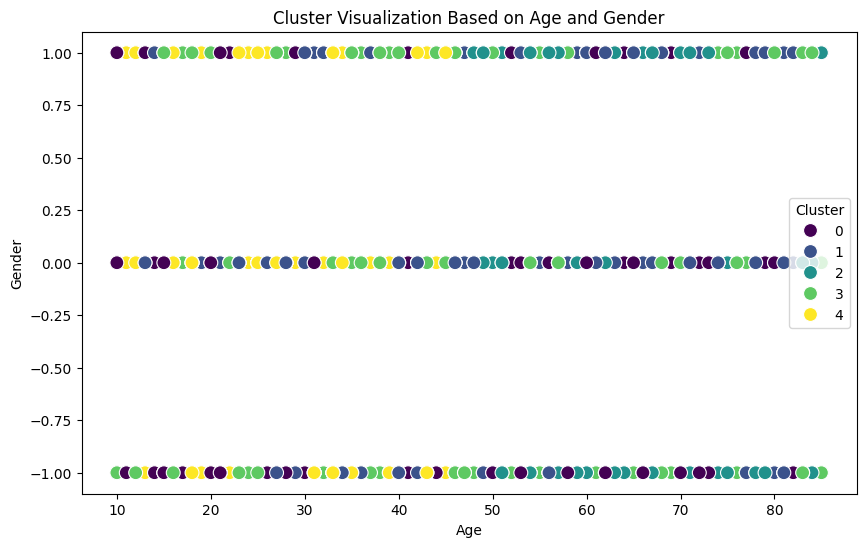

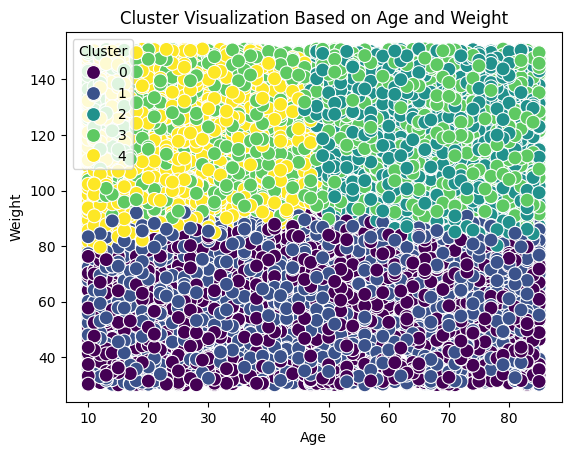

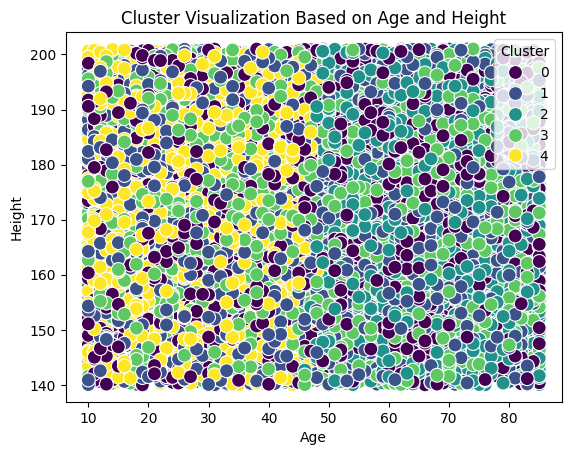

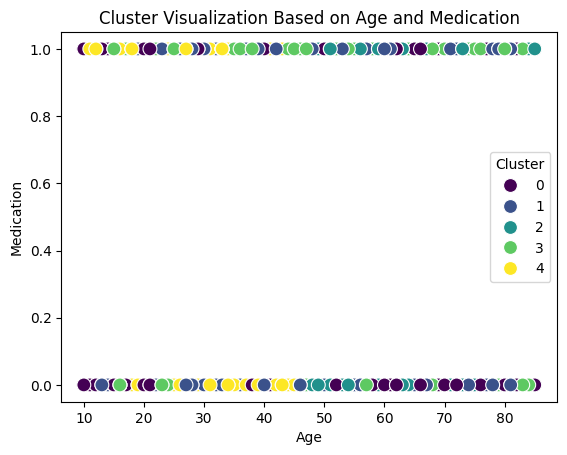

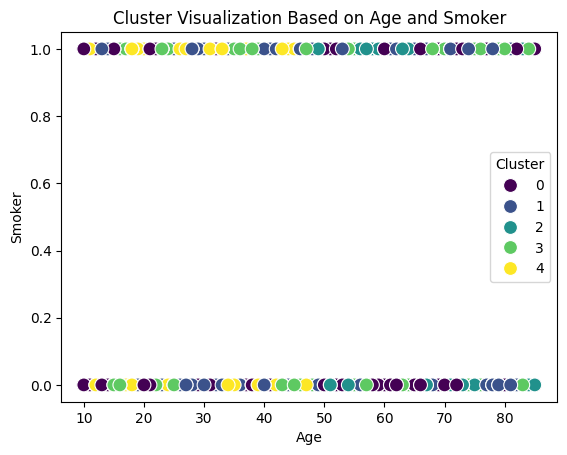

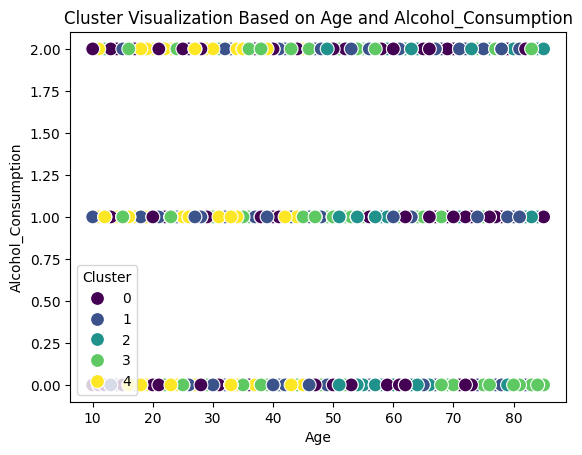

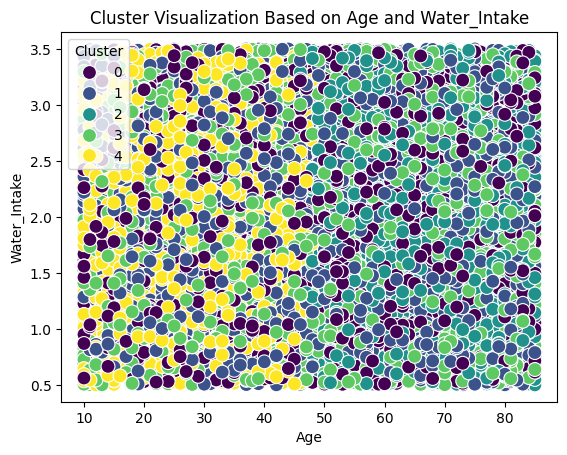

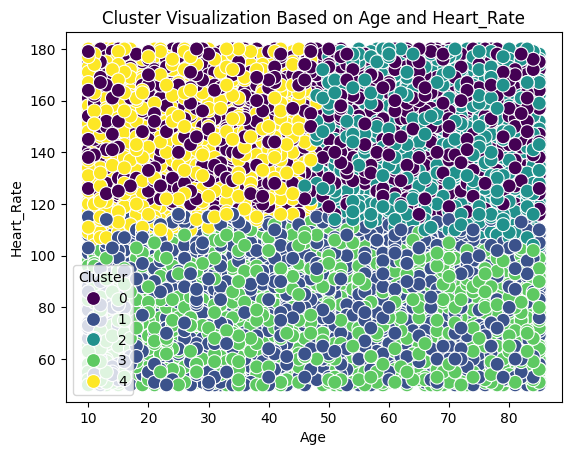

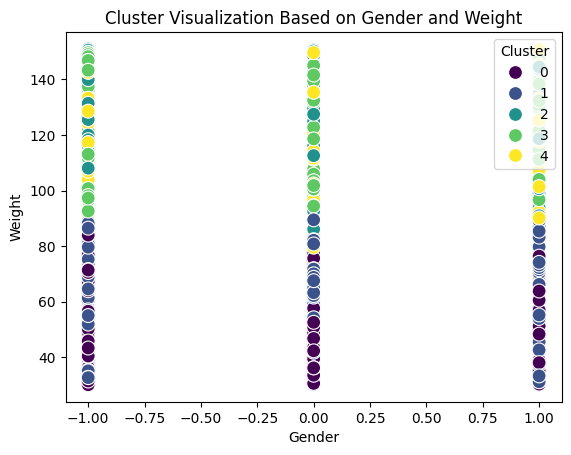

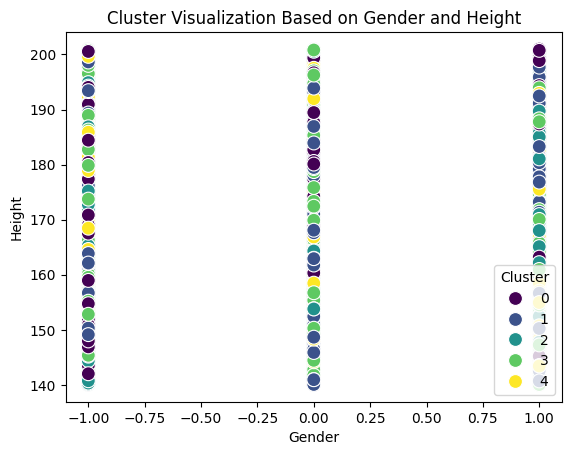

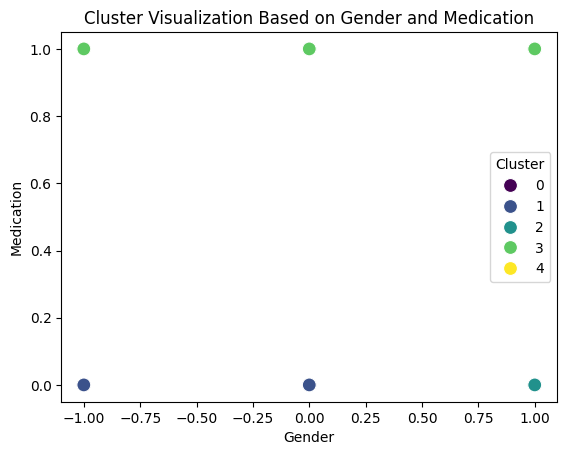

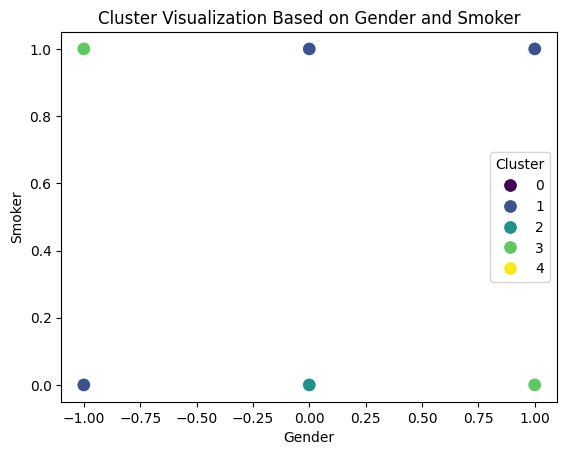

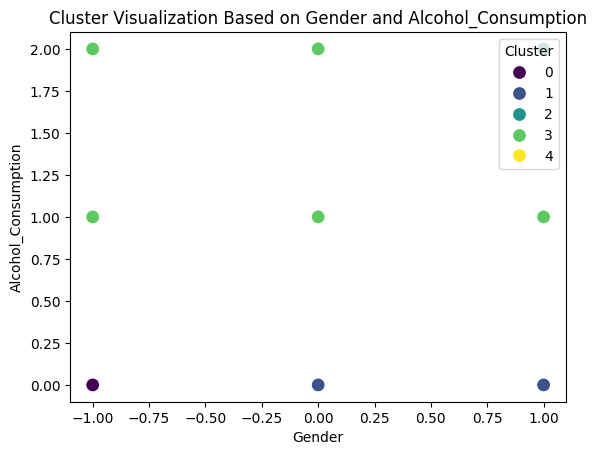

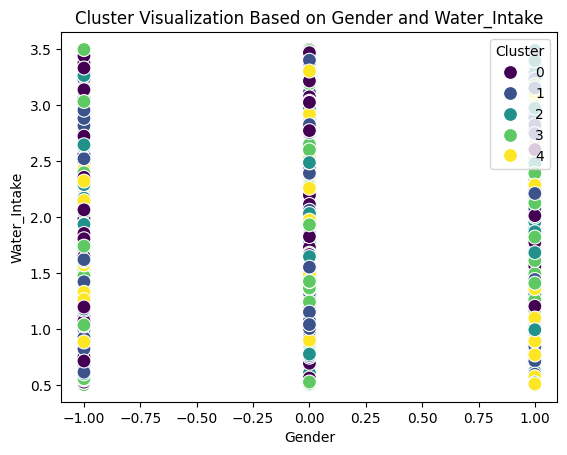

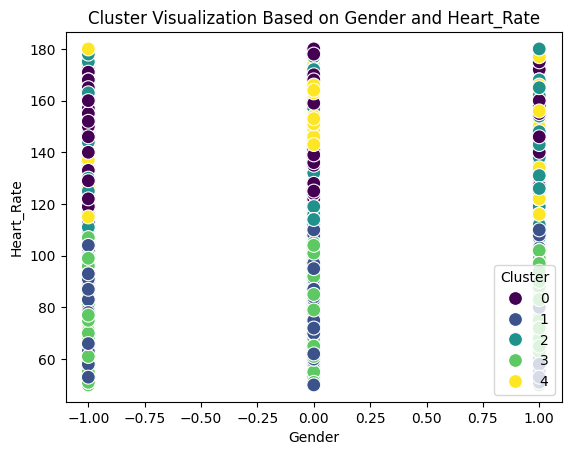

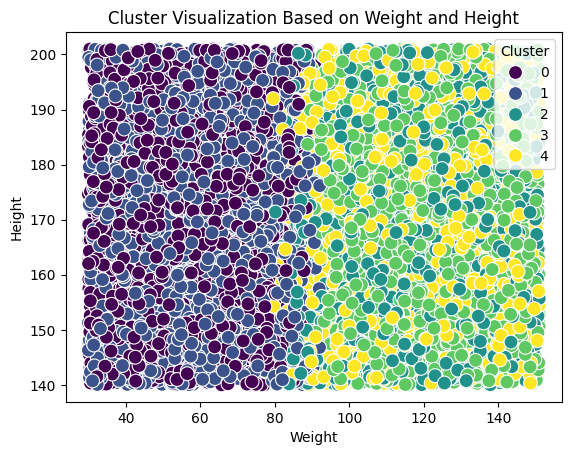

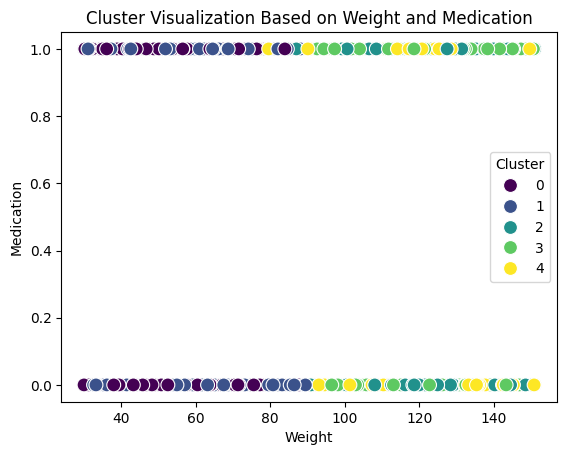

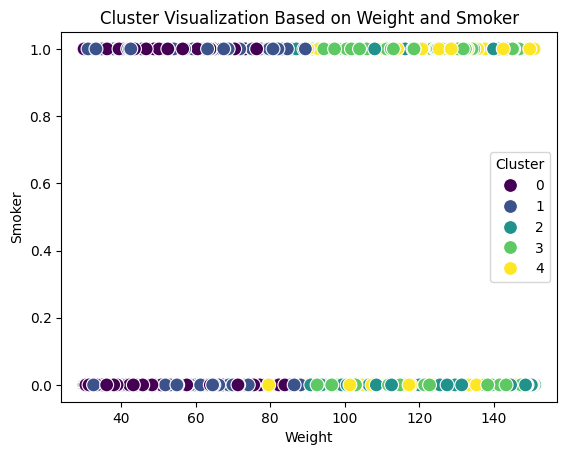

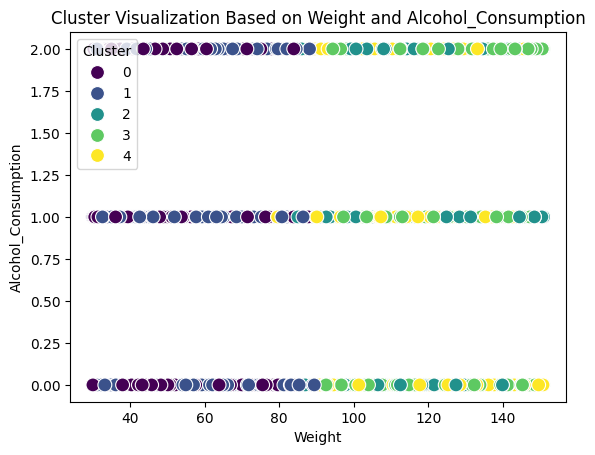

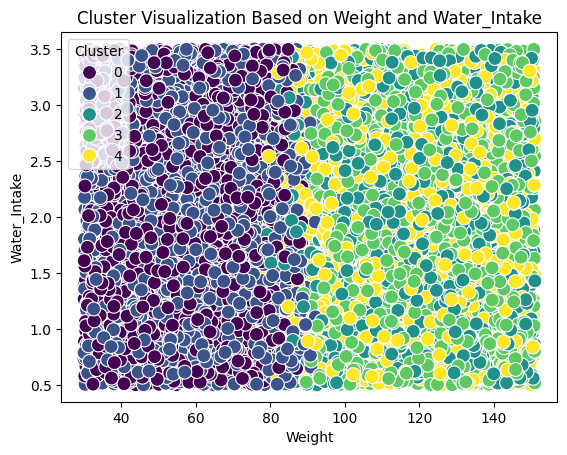

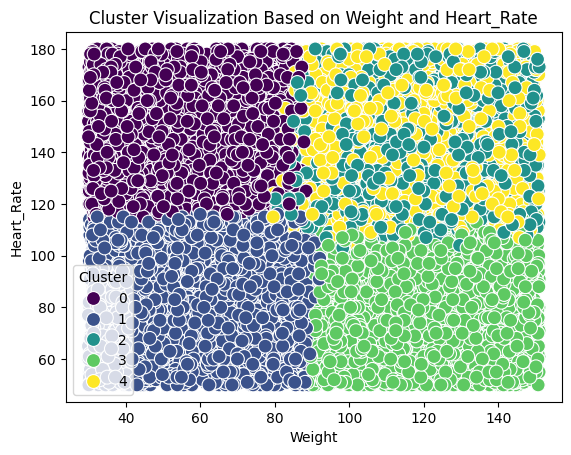

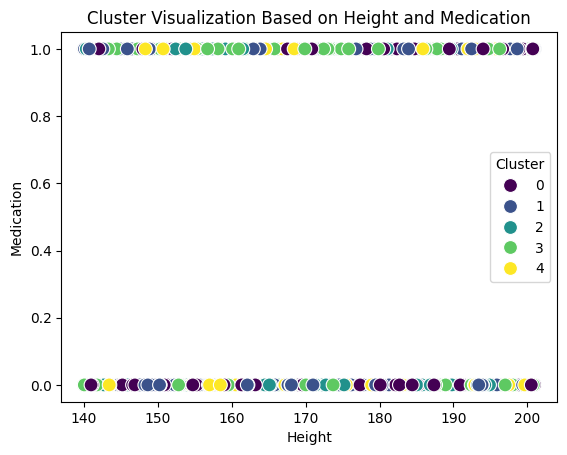

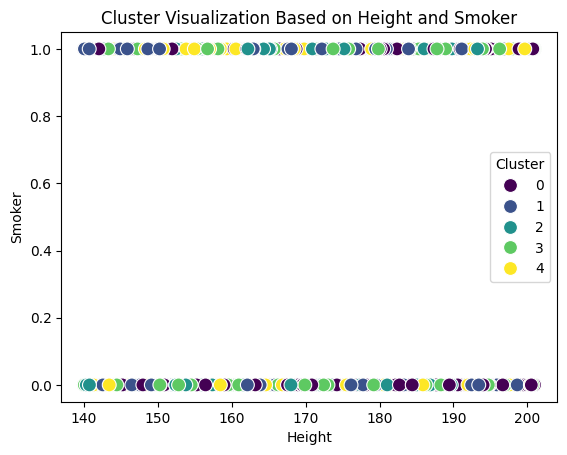

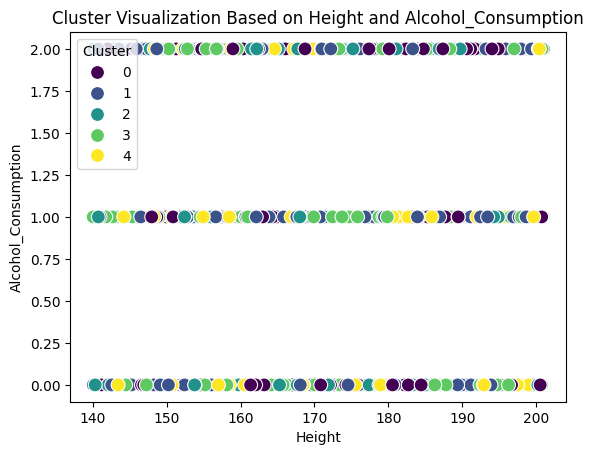

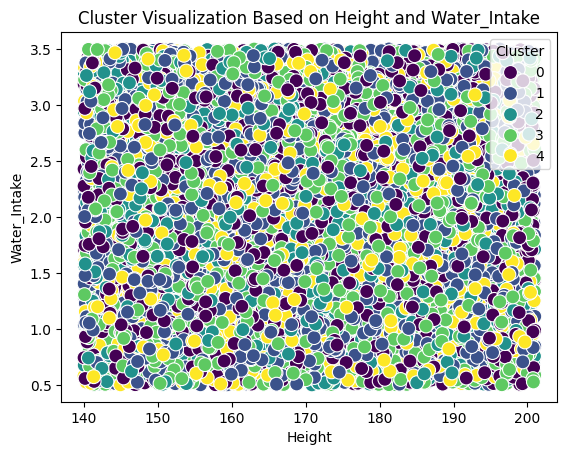

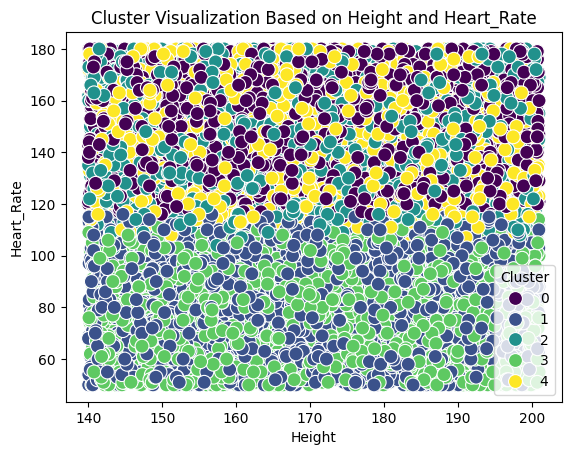

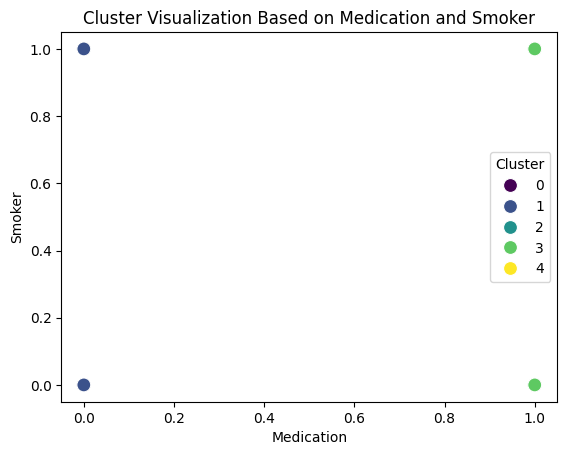

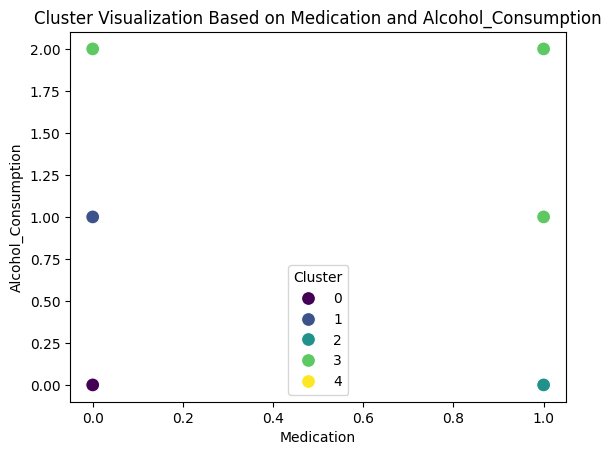

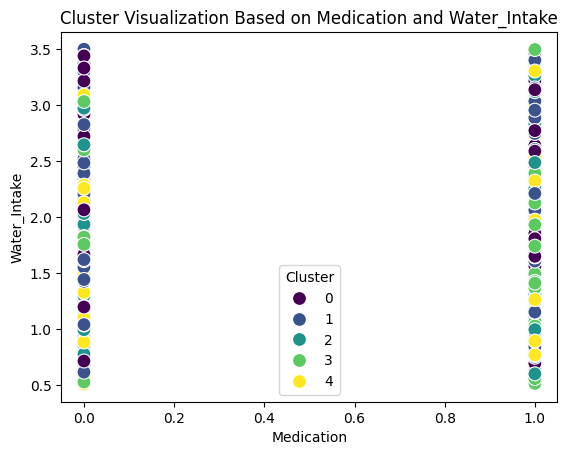

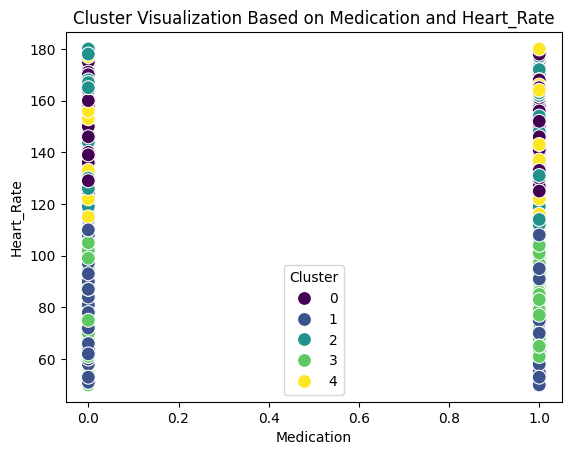

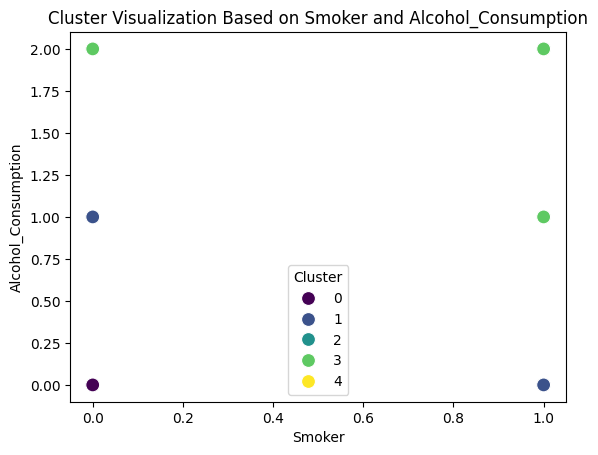

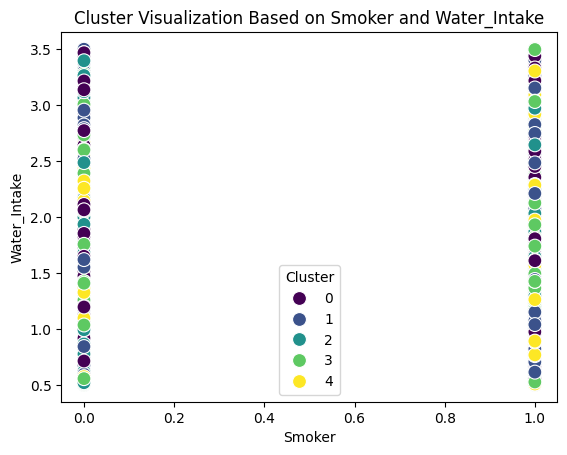

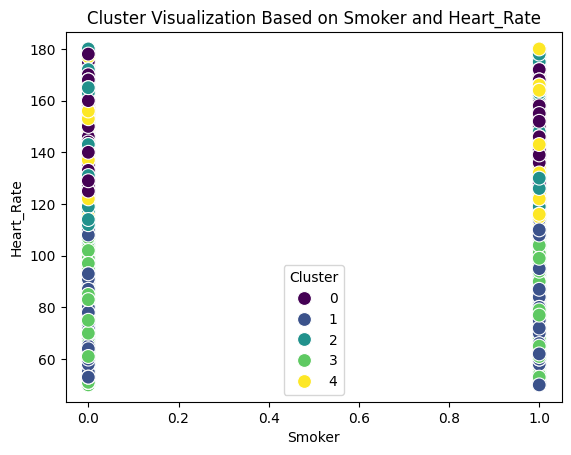

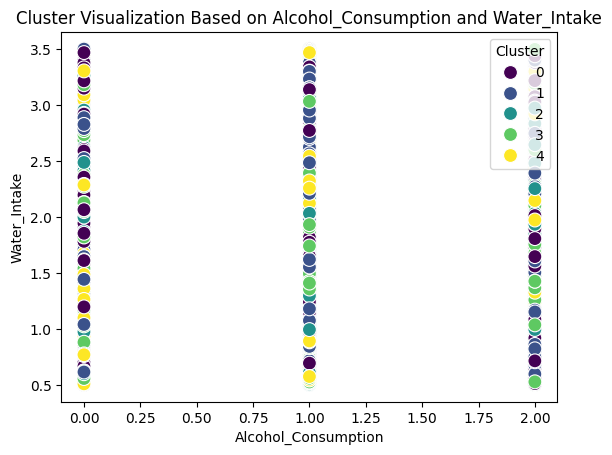

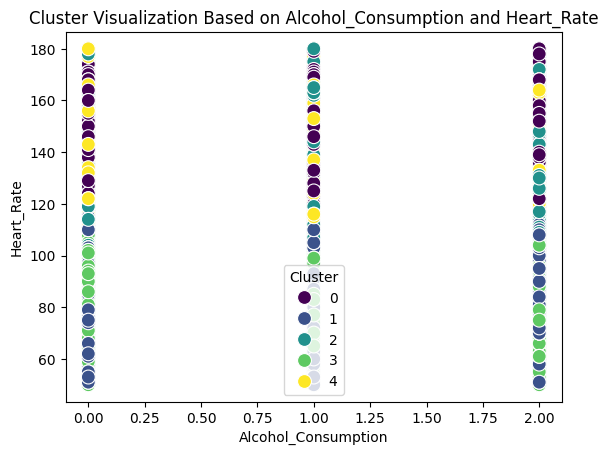

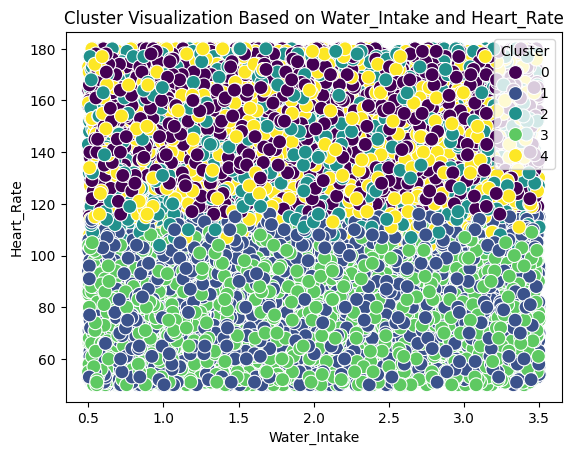

In [113]:
# Scatter plot
plt.figure(figsize=(10, 6))
columns = ['Age', 'Gender', 'Weight', 'Height','Medication', 'Smoker', 'Alcohol_Consumption', 'Water_Intake', 'Heart_Rate']
column_pairs = []
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column_pairs.append((columns[i], columns[j]))
for i, column_pair in enumerate(column_pairs):
    sns.scatterplot(x=column_pair[0], y=column_pair[1], hue='Cluster', data=people_data_ml, palette='viridis', s=100)
    plt.title('Cluster Visualization Based on {} and {}'.format(column_pair[0], column_pair[1]))
    plt.xlabel(column_pair[0])
    plt.ylabel(column_pair[1])
    plt.legend(title='Cluster')
    plt.show()